In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize 

In [2]:
A = (-43.9048056327210225) / (np.pi**2 * 800 * 9.1093837)
B = (2.5669699537181569) / (8.854187817 * 4 * np.pi)

In [3]:
A, B

(-0.000610426432346635, 0.023070775397276536)

In [4]:
A = 0

In [5]:
@np.vectorize
def numerator(k):
    def integrand(r):
        return np.exp(-2 * k * r) / r
    return integrate.quad(integrand, 0., np.inf)[0]

@np.vectorize
def denominator(k):
    def integrand(r):
        return np.exp(-2 * k * r)
    return integrate.quad(integrand, 0., np.inf)[0]

@np.vectorize
def I(k):
    return numerator(k)/denominator(k)

@np.vectorize
def E(k):
    return A * k**2 + B * I(k)

In [6]:
solution = optimize.minimize(E, [1], bounds=[(0., np.inf)])

/tmp/ipykernel_4310/250534212.py:5: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  return integrate.quad(integrand, 0., np.inf)[0]
/tmp/ipykernel_4310/250534212.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(integrand, 0., np.inf)[0]
/tmp/ipykernel_4310/250534212.py:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(integrand, 0., np.inf)[0]


In [7]:
solution

      fun: -1.124030347712066
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([16634399.21381101])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([0.])

/tmp/ipykernel_4310/250534212.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(integrand, 0., np.inf)[0]
/tmp/ipykernel_4310/250534212.py:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(integrand, 0., np.inf)[0]
/tmp/ipykernel_4310/250534212.py:11: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be 

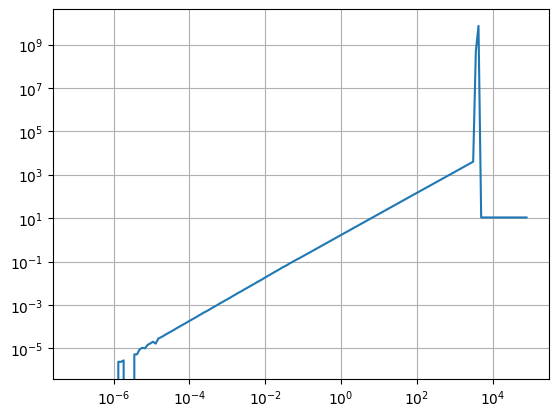

In [8]:
k = np.logspace(-7, 7, 200, base=10)
#k = np.linspace(-2000, 10000, 1000)
fig, axe = plt.subplots()
axe.loglog(k, E(k))
axe.scatter(solution.x, E(solution.x))
axe.grid(which="both")
#axe.set_ylim([1e-2, 1e9])

/tmp/ipykernel_4310/250534212.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(integrand, 0., np.inf)[0]
/tmp/ipykernel_4310/250534212.py:5: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  return integrate.quad(integrand, 0., np.inf)[0]
/tmp/ipykernel_4310/250534212.py:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(integrand, 0., np.inf)[0]
/tmp/ipykernel_4310/250534212.py:11: IntegrationWarning: The algorithm does not converge.  Roundoff 

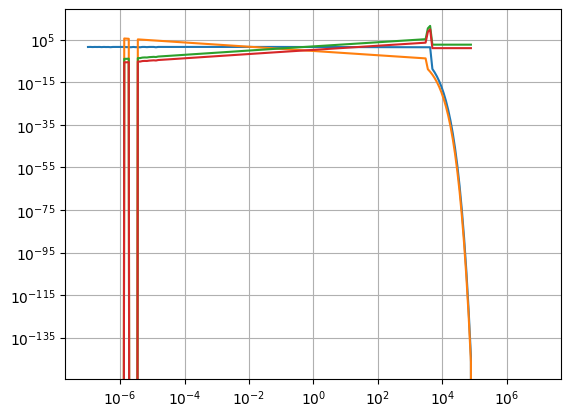

In [9]:
fig, axe = plt.subplots()
axe.loglog(k, numerator(k))
axe.plot(k, denominator(k))
axe.plot(k, I(k))
axe.plot(k, E(k))
#axe.set_ylim([1e-5, 1e5])
axe.grid()

In [10]:
x = np.linspace(1e-8, 10., 20000)
f = np.exp(-x)/x

In [11]:
integrate.trapezoid(f, x=x)

25008.850852907224